In [13]:
import datetime 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from os.path import join
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
import pipeline

In [14]:
# Survey Aggregate data and indicator data
df_agg, df_ind = pipeline.read_and_format_data()
# Smoothing the aggregate survey data
rolling_window_size = 20
df_agg = pipeline.data_filter(df_agg, window_size=rolling_window_size)

In [15]:
df_ind.columns

Index(['CONSSENT Index', 'CONCCONF Index', 'BASPCCUS Index', 'DELQUS30 Index',
       'DELQUS90 Index', 'USDECRED Index', 'PCE CYOY Index', 'CPI XYOY Index',
       'CPI YOY Index', 'NYCNMIIR Index', 'NFP TCH Index', 'AHE TOTL Index',
       'REALYAHE Index', 'PPIDGROC Index ', 'AUTMUSAG Index',
       'RCPPTFAV Index'],
      dtype='object')

In [16]:
df_ind.describe()

,CONSSENT Index,CONCCONF Index,BASPCCUS Index,DELQUS30 Index,DELQUS90 Index,USDECRED Index,PCE CYOY Index,CPI XYOY Index,CPI YOY Index,NFP TCH Index,AHE TOTL Index,REALYAHE Index,PPIDGROC Index,AUTMUSAG Index,RCPPTFAV Index
count,6035.000000,6023.000000,5685.000000,5576.000000,4490.000000,6010.000000,6023.000000,6023.000000,6023.000000,6023.000000,4576.000000,4315.000000,5163.000000,4715.000000,2162.000000
mean,82.792428,93.266744,7546.351418,2.726725,1.181717,3.447459,2.026711,2.323244,2.535348,87.588909,25.483455,3.011101,148.095101,3.172520,39.808788
std,12.689908,24.953262,700.555243,1.467488,0.748508,1.279386,1.016602,1.146110,1.830371,1318.186961,3.654494,1.177887,30.510297,0.657132,3.725056
min,50.000000,25.300000,6538.230000,0.780000,0.360000,1.550000,0.625590,0.600000,-2.100000,-20514.000000,20.040000,0.600000,100.000000,1.880000,22.700000
25%,73.200000,77.000000,6939.470000,1.490000,0.700000,2.390000,1.503110,1.700000,1.500000,40.000000,22.590000,2.100000,123.100000,2.650000,38.700000
50%,84.900000,97.400000,7252.050000,2.240000,0.790000,3.060000,1.744720,2.100000,2.200000,158.000000,24.660000,2.700000,142.400000,3.030000,41.000000
75%,93.100000,109.900000,8029.960000,3.980000,1.610000,4.530000,2.107510,2.400000,3.400000,256.000000,27.790000,3.400000,168.900000,3.700000,42.100000
max,107.600000,142.500000,9228.380000,5.870000,3.100000,6.770000,5.574700,6.600000,9.100000,4565.000000,33.880000,8.100000,229.842000,5.470000,45.800000


In [17]:
for indicator in df_ind.columns:
    # Get the combined monthly survey data with indicator data
    print(f"Indicator: {indicator}")
    if pd.api.types.is_numeric_dtype(df_ind[indicator]):
        df_comb = pipeline.get_combined_data_with_given_indicator(df_ind, df_agg, indicator_col=indicator)
        print("Lasso Model (alpha=0.01):")
        pipeline.run_model(df_comb, lookback_period=12, model=Lasso(alpha=0.01))
        print('\n')

Indicator: CONSSENT Index
Lasso Model (alpha=0.01):
R-squared: 0.8529216296958392, MAE: 3.14435131628515, MAPE: 0.04619786614579507


Indicator: CONCCONF Index
Lasso Model (alpha=0.01):


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.205e-01, tolerance: 4.725e-02
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

R-squared: 0.9619048694355764, MAE: 2.264082326823241, MAPE: 0.021230566027338985


Indicator: BASPCCUS Index
Lasso Model (alpha=0.01):


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e+03, tolerance: 3.721e+02
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.490e+03, tolerance: 3.583e+02
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

R-squared: 0.9999999999415177, MAE: 0.021412771007453556, MAPE: 2.320317620047302e-06


Indicator: DELQUS30 Index
Lasso Model (alpha=0.01):
R-squared: 0.6356953028304283, MAE: 0.10178991931079608, MAPE: 0.10024122720871383


Indicator: DELQUS90 Index
Lasso Model (alpha=0.01):
R-squared: 0.45144226517889186, MAE: 0.062017396132000406, MAPE: 0.1268484765409871


Indicator: USDECRED Index
Lasso Model (alpha=0.01):
R-squared: 0.8186184205118676, MAE: 0.1945702001867408, MAPE: 0.0861387853644647


Indicator: PCE CYOY Index


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Lasso Model (alpha=0.01):
R-squared: 0.8775680879987044, MAE: 0.3863986739277383, MAPE: 0.12619427628089186


Indicator: CPI XYOY Index
Lasso Model (alpha=0.01):


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


R-squared: 0.7638916933676262, MAE: 0.46890047126876694, MAPE: 0.10386764265983646


Indicator: CPI YOY Index
Lasso Model (alpha=0.01):
R-squared: 0.8760437585651684, MAE: 0.5848157196709044, MAPE: 0.15387793660107515


Indicator: NYCNMIIR Index
Indicator: NFP TCH Index
Lasso Model (alpha=0.01):


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+05, tolerance: 4.493e+04
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e+05, tolerance: 4.507e+04
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+03, tolerance: 3.573e+01
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.775e+02, tolerance: 3.498e+01
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

R-squared: 0.07657083687422794, MAE: 946.1738942751741, MAPE: 0.7585247526925443


Indicator: AHE TOTL Index
Lasso Model (alpha=0.01):


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


R-squared: 0.9932699080305385, MAE: 0.35088185608086203, MAPE: 0.011076711507436087


Indicator: REALYAHE Index
Lasso Model (alpha=0.01):


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


R-squared: 0.5818022155488232, MAE: 0.4492210597030813, MAPE: 0.15830242910303965


Indicator: PPIDGROC Index 
Lasso Model (alpha=0.01):


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


R-squared: 0.9908206646140292, MAE: 2.488479154943443, MAPE: 0.012661709392379724


Indicator: AUTMUSAG Index
Lasso Model (alpha=0.01):
R-squared: 0.9831215658447904, MAE: 0.0813512396694215, MAPE: 0.02198424523012041


Indicator: RCPPTFAV Index
Lasso Model (alpha=0.01):
R-squared: 0.7959598480745793, MAE: 0.6568526773800668, MAPE: 0.01599802966817815




In [18]:
df_comb

,Q3A1666,Q3A1667,Q3A1668,Q3A1669,Q3A1670,Q3A1671,Q3A1672,Q3A1673,Q3A1674,Q3A1675,...,Q3053A8021,Q3053A8022,Q3053A8023,Q3053A8024,Q3053A8025,Q3053A8026,Q3053A8027,Q3053A8028,Q3053A8029,RCPPTFAV Index
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-14,0.430663,0.083199,0.184026,0.851770,0.406011,0.478316,0.226016,0.807790,0.318927,0.250563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3
2019-10-15,0.428124,0.080604,0.180575,0.853220,0.398996,0.472793,0.221618,0.807965,0.317401,0.249440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.4
2019-10-16,0.432585,0.079581,0.178785,0.855671,0.402458,0.472719,0.223565,0.808491,0.320320,0.246427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7
2019-10-22,0.430147,0.079104,0.173668,0.850253,0.395165,0.465254,0.219357,0.805823,0.312944,0.241214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.1
2019-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Running regression models on the data as is

In [19]:
def get_linear_regression_summary(X, y):
    # adding the constant term
    X = sm.add_constant(X)
    # performing the regression
    # and fitting the model
    result = sm.OLS(y, X).fit()
    # printing the summary table
    print(result.summary())

def get_lasso_regression_summary(X, y, alp = 0.001):
    lasso = Lasso(alpha = alp)
    lasso.fit(X, y)
   
    coef = pd.Series(lasso.coef_, index = X.columns)
#     print(lasso.coef_ != 0)
    pred = lasso.predict(X)
    train_score = lasso.score(X, y)
    important_features = pd.concat([coef.sort_values().head(10),\
                     coef.sort_values().tail(10)])
    important_features.plot(kind = "barh")
    plt.title(f"Coefficients in the Lasso Model with alpha = {alp}")
    plt.show()
    print(f'alpha = {alp}')
    print(f'Lasso coef: {lasso.coef_}')
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " \
          +  str(sum(coef == 0)) + " variables")
    print(f'Train score of trained model: {train_score*100}')

In [20]:
for indicator in df_ind.columns:
    # Get the combined monthly survey data with indicator data
    print(f"Indicator: {indicator}")
    if pd.api.types.is_numeric_dtype(df_ind[indicator]):
        df_comb = pipeline.get_combined_data_with_given_indicator(df_ind, df_agg, indicator_col=indicator)
        df_comb = df_comb.dropna(axis=1,how='all').bfill().ffill()
        print(df_comb.shape)
        X = df_comb.iloc[:,:-1]
        y = df_comb.iloc[:,-1]
        y = (y - np.mean(y))/np.std(y)
        get_linear_regression_summary(X,y)
        print('\n')

Indicator: CONSSENT Index
(49, 1231)


/Users/shivam/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/shivam/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/shivam/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:         CONSSENT Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                nan
Time:                        03:58:46   Log-Likelihood:                 1440.8
No. Observations:                  49   AIC:                            -2784.
Df Residuals:                       0   BIC:                            -2691.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0501        inf         -0      

(59, 1231)
                            OLS Regression Results                            
Dep. Variable:         CONCCONF Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.653e+27
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.34e-148
Time:                        03:58:48   Log-Likelihood:                 1808.0
No. Observations:                  59   AIC:                            -3520.
Df Residuals:                      11   BIC:                            -3420.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0212   1.26e-14   1.6

(16, 1231)


/Users/shivam/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:         BASPCCUS Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.828e+30
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          6.15e-164
Time:                        03:58:51   Log-Likelihood:                 526.65
No. Observations:                  16   AIC:                            -1043.
Df Residuals:                      11   BIC:                            -1039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Q3A1666        -0.0072   3.66e-16  -1.98e+13      

(56, 1231)
                            OLS Regression Results                            
Dep. Variable:         DELQUS30 Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.344e+26
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.36e-142
Time:                        03:58:53   Log-Likelihood:                 1643.9
No. Observations:                  56   AIC:                            -3198.
Df Residuals:                      11   BIC:                            -3107.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0670   4.28e-14  -1.5

(52, 1231)
                            OLS Regression Results                            
Dep. Variable:         DELQUS90 Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.402e+26
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.13e-142
Time:                        03:58:59   Log-Likelihood:                 1525.1
No. Observations:                  52   AIC:                            -2968.
Df Residuals:                      11   BIC:                            -2888.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0310   3.17e-14  -9.7

(26, 1231)
                            OLS Regression Results                            
Dep. Variable:         USDECRED Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.509e+27
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          5.76e-148
Time:                        03:59:00   Log-Likelihood:                 779.80
No. Observations:                  26   AIC:                            -1530.
Df Residuals:                      11   BIC:                            -1511.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Q3A1666         0.3935   2.24e-14   1.7

(59, 1231)
                            OLS Regression Results                            
Dep. Variable:         PCE CYOY Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.924e+25
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.15e-139
Time:                        03:59:03   Log-Likelihood:                 1697.6
No. Observations:                  59   AIC:                            -3299.
Df Residuals:                      11   BIC:                            -3200.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0177   8.27e-14  -2.1

(51, 1231)
                            OLS Regression Results                            
Dep. Variable:         CPI XYOY Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.574e+26
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          6.08e-143
Time:                        03:59:05   Log-Likelihood:                 1498.1
No. Observations:                  51   AIC:                            -2916.
Df Residuals:                      11   BIC:                            -2839.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0363   2.93e-14  -1.2

(56, 1231)
                            OLS Regression Results                            
Dep. Variable:          CPI YOY Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.664e+25
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          8.36e-142
Time:                        03:59:07   Log-Likelihood:                 1634.7
No. Observations:                  56   AIC:                            -3179.
Df Residuals:                      11   BIC:                            -3088.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0708   5.18e-14   1.3

(59, 1231)
                            OLS Regression Results                            
Dep. Variable:          NFP TCH Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.670e+26
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          9.13e-147
Time:                        03:59:09   Log-Likelihood:                 1785.3
No. Observations:                  59   AIC:                            -3475.
Df Residuals:                      11   BIC:                            -3375.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4222   1.86e-14   2.2

(57, 1231)
                            OLS Regression Results                            
Dep. Variable:         AHE TOTL Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.684e+28
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          3.00e-155
Time:                        03:59:14   Log-Likelihood:                 1824.9
No. Observations:                  57   AIC:                            -3558.
Df Residuals:                      11   BIC:                            -3464.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0405   3.15e-15  -1.2

(54, 1231)
                            OLS Regression Results                            
Dep. Variable:         REALYAHE Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.217e+27
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.81e-149
Time:                        03:59:17   Log-Likelihood:                 1659.6
No. Observations:                  54   AIC:                            -3233.
Df Residuals:                      11   BIC:                            -3148.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1007   1.01e-14  -9.9

(59, 1231)
                            OLS Regression Results                            
Dep. Variable:        PPIDGROC Index    R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.050e+28
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          3.37e-157
Time:                        03:59:19   Log-Likelihood:                 1914.2
No. Observations:                  59   AIC:                            -3732.
Df Residuals:                      11   BIC:                            -3633.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0371   2.09e-15   1.7

(619, 1231)
                            OLS Regression Results                            
Dep. Variable:         AUTMUSAG Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1888.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.44e-62
Time:                        03:59:26   Log-Likelihood:                 2258.9
No. Observations:                 619   AIC:                            -3366.
Df Residuals:                      43   BIC:                            -815.2
Df Model:                         575                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2148      0.174     

(359, 1231)
                            OLS Regression Results                            
Dep. Variable:         RCPPTFAV Index   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     54.08
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           9.18e-20
Time:                        03:59:33   Log-Likelihood:                 649.97
No. Observations:                 359   AIC:                            -637.9
Df Residuals:                      28   BIC:                             647.4
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2408      0.524     

Indicator: CONSSENT Index
(49, 1231)


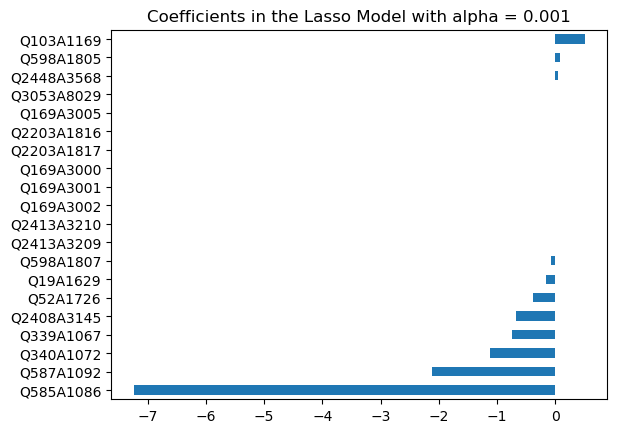

alpha = 0.001
Lasso coef: [ 0.  0.  0. ... -0. -0.  0.]
Lasso picked 11 variables and eliminated the other 1219 variables
Train score of trained model: 97.5018841875258


Indicator: CONCCONF Index
(59, 1231)


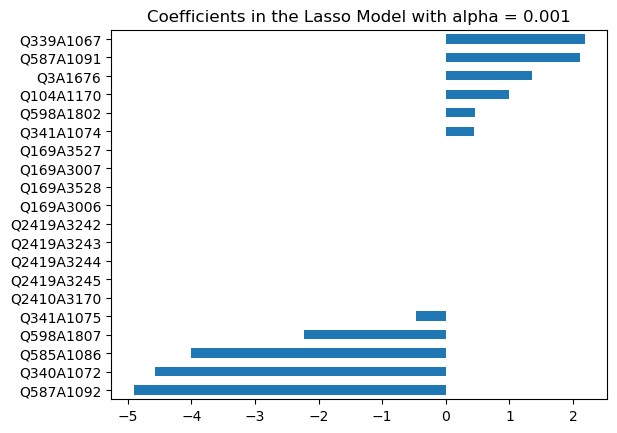

alpha = 0.001
Lasso coef: [-0. -0. -0. ... -0. -0.  0.]
Lasso picked 11 variables and eliminated the other 1219 variables
Train score of trained model: 96.42526236439008


Indicator: BASPCCUS Index
(16, 1231)


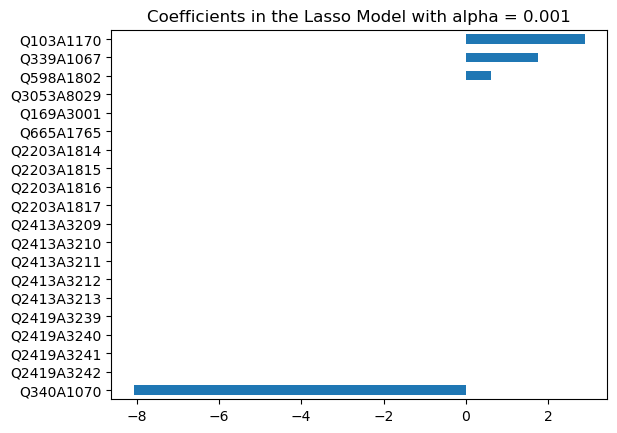

alpha = 0.001
Lasso coef: [-0. -0.  0. ...  0.  0.  0.]
Lasso picked 4 variables and eliminated the other 1226 variables
Train score of trained model: 99.93212133910058


Indicator: DELQUS30 Index
(56, 1231)


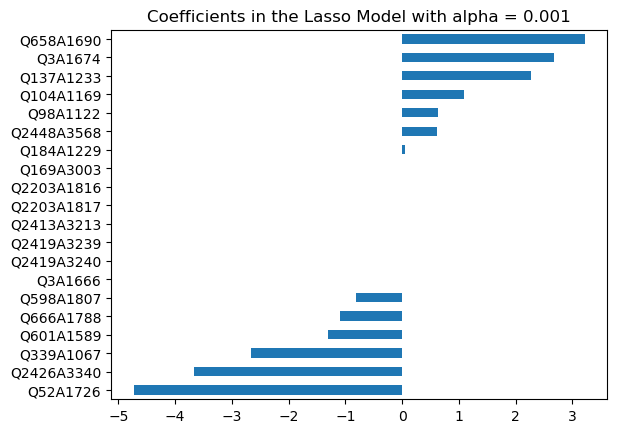

alpha = 0.001
Lasso coef: [ 0.  0.  0. ... -0. -0. -0.]
Lasso picked 13 variables and eliminated the other 1217 variables
Train score of trained model: 98.70829116972772


Indicator: DELQUS90 Index
(52, 1231)


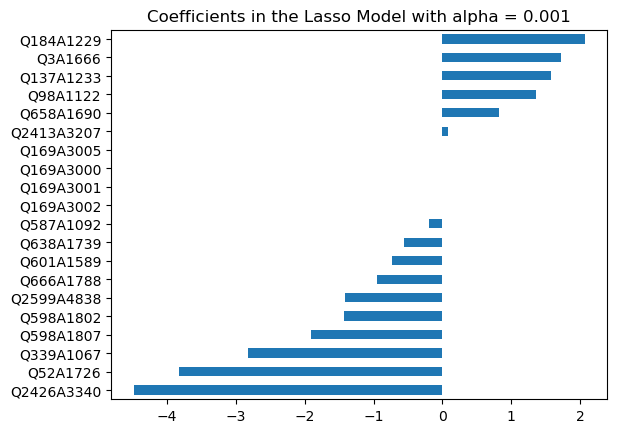

alpha = 0.001
Lasso coef: [ 1.7238735  0.         0.        ... -0.        -0.         0.       ]
Lasso picked 16 variables and eliminated the other 1214 variables
Train score of trained model: 96.7171026257546


Indicator: USDECRED Index
(26, 1231)


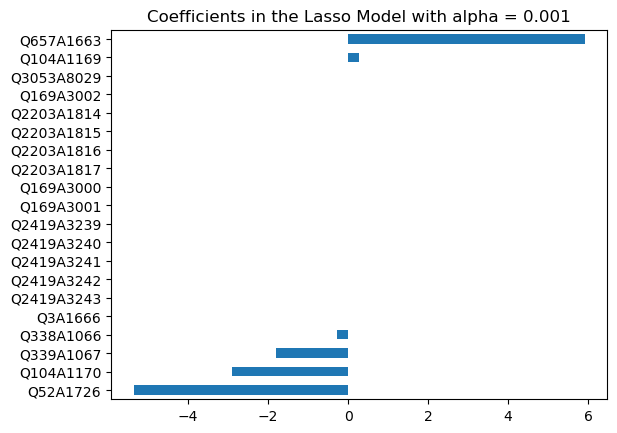

alpha = 0.001
Lasso coef: [ 0.  0.  0. ...  0.  0. -0.]
Lasso picked 6 variables and eliminated the other 1224 variables
Train score of trained model: 98.82261922619278


Indicator: PCE CYOY Index
(59, 1231)


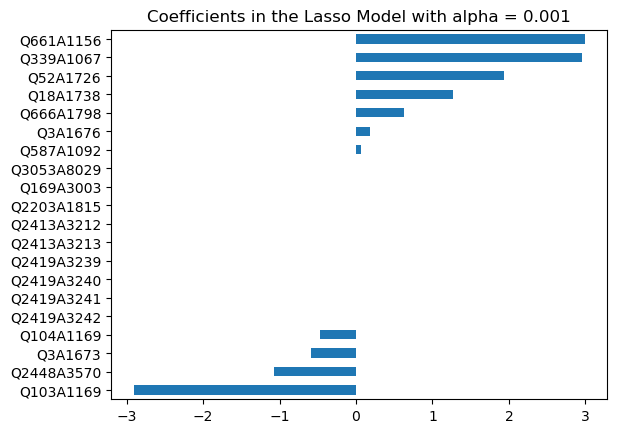

alpha = 0.001
Lasso coef: [-0. -0. -0. ...  0.  0. -0.]
Lasso picked 11 variables and eliminated the other 1219 variables
Train score of trained model: 98.42394775772073


Indicator: CPI XYOY Index
(51, 1231)


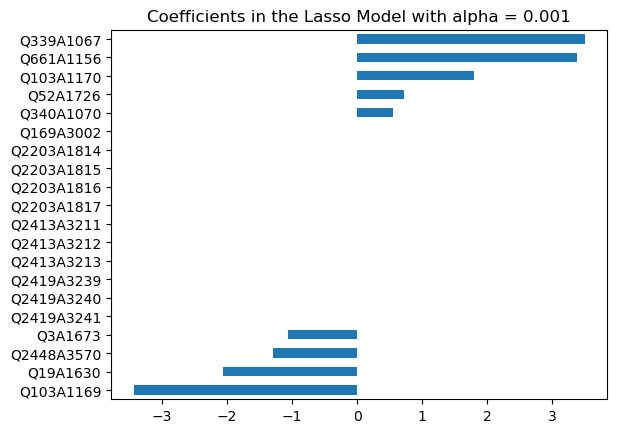

alpha = 0.001
Lasso coef: [-0. -0. -0. ...  0.  0. -0.]
Lasso picked 9 variables and eliminated the other 1221 variables
Train score of trained model: 98.1041420390321


Indicator: CPI YOY Index
(56, 1231)


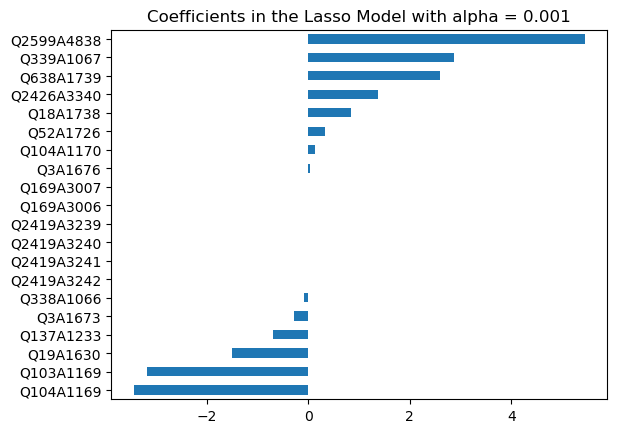

alpha = 0.001
Lasso coef: [-0. -0. -0. ...  0.  0. -0.]
Lasso picked 14 variables and eliminated the other 1216 variables
Train score of trained model: 97.66827706819632


Indicator: NYCNMIIR Index
Indicator: NFP TCH Index
(59, 1231)


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e-02, tolerance: 5.900e-03
  model = cd_fast.enet_coordinate_descent(


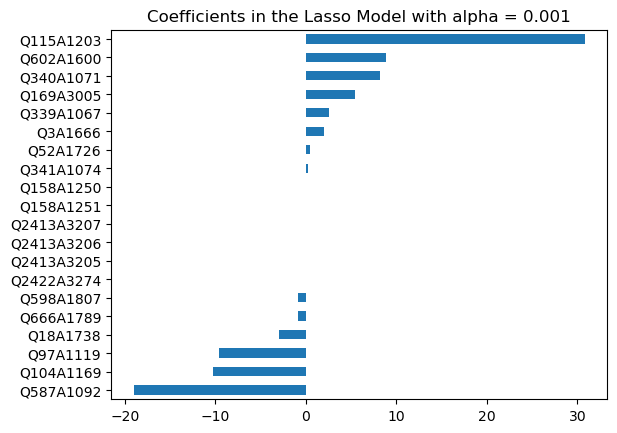

alpha = 0.001
Lasso coef: [ 1.96381446  0.         -0.         ...  0.          0.
 -0.        ]
Lasso picked 14 variables and eliminated the other 1216 variables
Train score of trained model: 87.53743035541504


Indicator: AHE TOTL Index
(57, 1231)


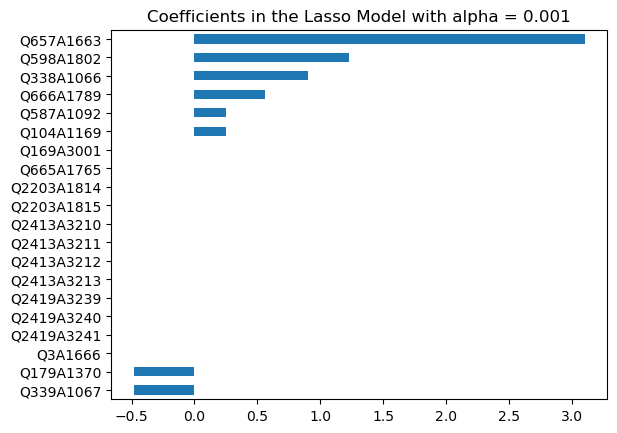

alpha = 0.001
Lasso coef: [-0. -0.  0. ... -0. -0.  0.]
Lasso picked 8 variables and eliminated the other 1222 variables
Train score of trained model: 99.19307725842398


Indicator: REALYAHE Index
(54, 1231)


/Users/shivam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.801e-02, tolerance: 5.400e-03
  model = cd_fast.enet_coordinate_descent(


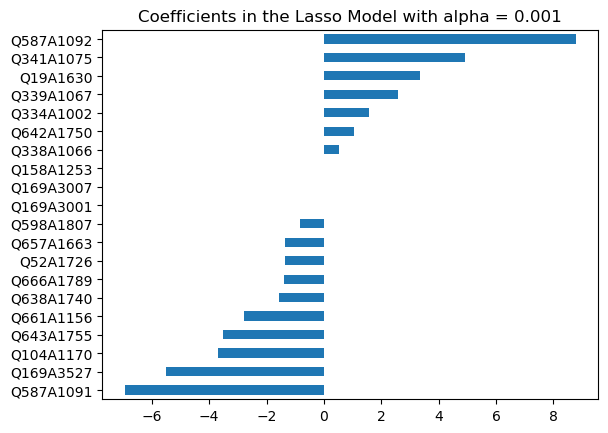

alpha = 0.001
Lasso coef: [0. 0. 0. ... 0. 0. 0.]
Lasso picked 19 variables and eliminated the other 1211 variables
Train score of trained model: 88.47868498439142


Indicator: PPIDGROC Index 
(59, 1231)


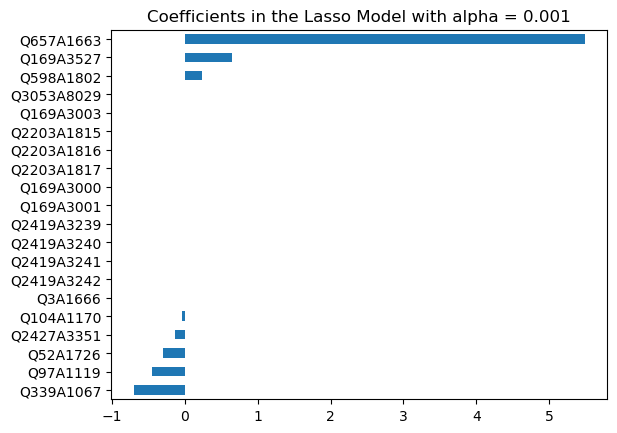

alpha = 0.001
Lasso coef: [-0. -0.  0. ...  0.  0. -0.]
Lasso picked 8 variables and eliminated the other 1222 variables
Train score of trained model: 98.92065733705898


Indicator: AUTMUSAG Index
(619, 1231)


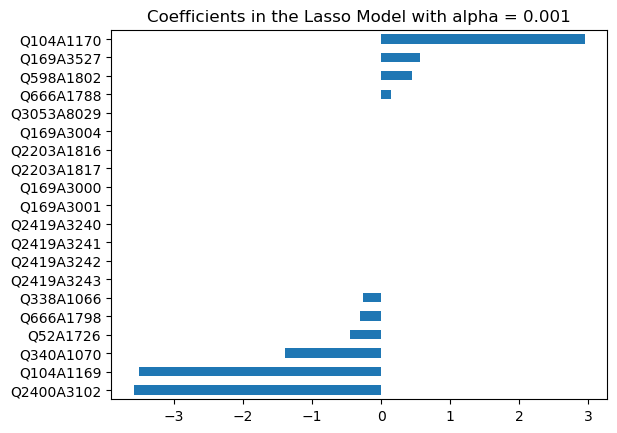

alpha = 0.001
Lasso coef: [-0.  0. -0. ... -0.  0.  0.]
Lasso picked 10 variables and eliminated the other 1220 variables
Train score of trained model: 97.91583093070021


Indicator: RCPPTFAV Index
(359, 1231)


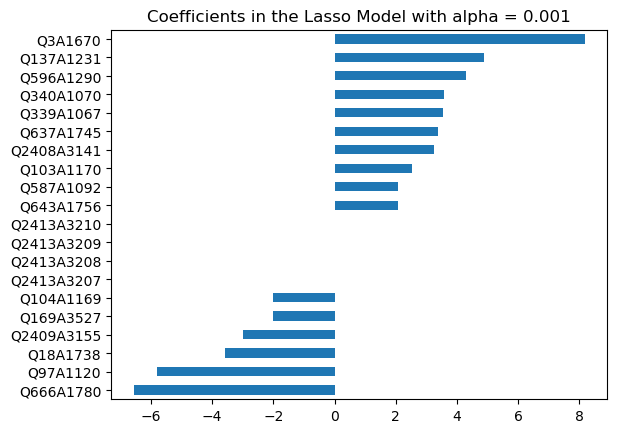

alpha = 0.001
Lasso coef: [ 0. -0.  0. ...  0. -0. -0.]
Lasso picked 19 variables and eliminated the other 1211 variables
Train score of trained model: 84.60387425593996




In [21]:
for indicator in df_ind.columns:
    # Get the combined monthly survey data with indicator data
    print(f"Indicator: {indicator}")
    if pd.api.types.is_numeric_dtype(df_ind[indicator]):
        df_comb = pipeline.get_combined_data_with_given_indicator(df_ind, df_agg, indicator_col=indicator)
        df_comb = df_comb.dropna(axis=1,how='all').bfill().ffill()
        print(df_comb.shape)
        X = df_comb.iloc[:,:-1]
        y = df_comb.iloc[:,-1]
        y = (y - np.mean(y))/np.std(y)
        get_lasso_regression_summary(X,y)
        print('\n')